# About Numpy

* Python extensions for manipulating large sets of objects organised in a grid-like fashion
  * Vectors
  * Matrices
  * etc...
* Normal Python datastructures too slow

# Using Numpy

The common way of using NumPy is to import the module with the following statement:

In [1]:
import numpy as np

The reason for not just importing **numpy** and importing it as np is to limit the prefixing of function when using Numpy. It it also not recommended to use from to import numpy as this will conflict with other functions in Python

# Array objects

The array object is the main data type in NumPy. To be efficient array objects are allocated as continous blocks of numbers in memory.

## Creating arrays

Arrays can be constructed using the **np.array()** function. The first argument contains the values as lists and the last argument specifies the datatype.

In [3]:
a = np.array([1, 2, 3], float)
print(a)

[1. 2. 3.]


If no datatype is given NumPy figures out the data type automatically:

In [5]:
a = np.array([1, 2, 3])
print(a)

[1 2 3]


In [7]:
a = np.array([1.0, 2.0, 3.0])
print(a)

[1. 2. 3.]


Compared to lists, an array can only contain values the same data type. Mixing is not possible

### Multidimensional arrays

Multidimensional arrays can be created by specifying nested lists in the **np.array()** function.

In [8]:
a = np.array([[1,2],[3,4]])
print(a)

b = np.array([[1,2,3,4],[5,6,7,8]], float)
print(b)

[[1 2]
 [3 4]]
[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


## Working with arrays

Arrays are always stored as 1-dimensional arrays in memory. Dimensions are only a way of traversing a 1-dimensional array. 

By default NumPy stores arrays in memory row-wise, which is also how C and C++ stores 2-dimensional arrays. Fortran stores arrays columnwise. The figure below illustrates this:

![variable references 1](images/array1.png)

### Array information

There are several ways of querying information on the array datatypes. The most important is the shape of the array, which is queried using the **.shape** property

In [9]:
a = np.array([1,2,3,4])
b = np.array([[1,2],[3,4]])
c = np.array([[[1,2,3,4],
               [5,6,7,8]],
              [[1,2,3,4],
               [5,6,7,8]]],float)

print(a.shape)
print(b.shape)
print(c.shape)

(4,)
(2, 2)
(2, 2, 4)


For a two-dimensional array the rows and columns can be assigned variables using:

In [11]:
r, c = b.shape
print(r, c)

2 2


The number of dimensions can be queried using the **.ndim** property:

In [12]:
print(b.ndim)

2


There are several other properties that can be interested to query, which are shown in the following example:

In [14]:
b = np.array([[1,2],[3,4]])
print("array shape =", b.shape) # Size
print("array ndim =", b.ndim)   # Number of dimensions
print("array dtype =", b.dtype) # Data type
print("array size =", b.size)   # Number of elements in the array
print("array itemsize =", b.itemsize) # Size of an element in bytes

array shape = (2, 2)
array ndim = 2
array dtype = int32
array size = 4
array itemsize = 4


### Changing shape of array

The reshape method can be used to change the shape of an array. As long as the number of elements does not change the memory allocated will be the same. We will use a special function to show this:

In [15]:
def memory_of(a):
    return a.__array_interface__["data"][0]

In the following example we change the shape of an array and examine the memory allocation:

In [16]:
a = np.array([[1,2],[3,4]])

print(a)
print(memory_of(a))

a_flat = np.reshape(a, [4,1])

print(a_flat)
print(memory_of(a_flat))

[[1 2]
 [3 4]]
2412695631104
[[1]
 [2]
 [3]
 [4]]
2412695631104


The memory is the same

Changing values in a will also change values in a_flat:

In [17]:
a[0,0] = 42

print(a)
print(a_flat)

[[42  2]
 [ 3  4]]
[[42]
 [ 2]
 [ 3]
 [ 4]]


If this behavior is not what you want, the **.copy()** method must be used to create a new copy of the array:

In [18]:
c = a.copy()
c[0,0] = 84

print(a)
print(memory_of(a))

print(c)
print(memory_of(c))

[[42  2]
 [ 3  4]]
2412695631104
[[84  2]
 [ 3  4]]
2412695630720


Now **c** does not refer to the same memory location as **a**.

More examples:

In [19]:
b = np.array([[1,2,3,4],[5,6,7,8]], float)
print(b)

b_shaped = np.reshape(b, [8,])
print(b_shaped)

b_shaped = np.reshape(b, [4,2])
print(b_shaped)

# **Please note** this is not the same as:
b_trans = np.transpose(b)
print(b_trans)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
[1. 2. 3. 4. 5. 6. 7. 8.]
[[1. 2.]
 [3. 4.]
 [5. 6.]
 [7. 8.]]
[[1. 5.]
 [2. 6.]
 [3. 7.]
 [4. 8.]]


### Resizing an array

**.resize()** is used to change the size of an existing array. Existing values will be kept if possible. New elements will be filled with values from the existing array.

In [21]:
base = np.array([[1,2],[3,4]])
print(base)

big = np.resize(base, [9,9])
print(big)

big = np.resize(base, [4,4])
print(big)

big = np.resize(base, [4,2])
print(big)

[[1 2]
 [3 4]]
[[1 2 3 4 1 2 3 4 1]
 [2 3 4 1 2 3 4 1 2]
 [3 4 1 2 3 4 1 2 3]
 [4 1 2 3 4 1 2 3 4]
 [1 2 3 4 1 2 3 4 1]
 [2 3 4 1 2 3 4 1 2]
 [3 4 1 2 3 4 1 2 3]
 [4 1 2 3 4 1 2 3 4]
 [1 2 3 4 1 2 3 4 1]]
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
[[1 2]
 [3 4]
 [1 2]
 [3 4]]


## Functions for creating arrays

In many cases it is impossible to create arrays in the code using the **np.array()** function. To create larger prefilled arrays NumPy implements a number of array-creation functions.

### Arrays with zeros

A common array type is an array filled with zeros. These can be created with the function **np.zeros()**. The function takes the shape as input and an optional data type.

In [22]:
a = np.zeros([4,4])
print(a)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [23]:
b = np.zeros([4,4], int)
print(b)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


### Arrays with ones

Arrays with ones are created using the **np.ones()** function.

In [24]:
c = np.ones([5,10], float)
print(c)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


I is possible to use **np.ones()** to create an array assigned with a specific value:

In [25]:
c = np.ones([5,10], float) * 42.0
print(c)

[[42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]
 [42. 42. 42. 42. 42. 42. 42. 42. 42. 42.]]


### Array ranges

In many application you need to create arrays which contain ranges of numbers. This can be done with the **np.arange()** function. This function is very similar to the standard Python **range()** function. An array with 10 elements with values from 0 to 9 is created with:

In [26]:
a = np.arange(10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


Combined with **np.reshape()** it is possible to create a range of arrays filled with value ranges:

In [27]:
b = np.reshape(np.arange(100), [10,10])
print(b)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


It is possible to give start, end and step just like the **range()** function:

In [28]:
a = np.arange(-10,10)
print(a)

a = np.arange(-10,10,2)
print(a)

[-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
[-10  -8  -6  -4  -2   0   2   4   6   8]


Just like **np.array()** it is possible to create ranges with a specific data type:

In [29]:
a = np.arange(-10,10,2, dtype=float)
print(a)

[-10.  -8.  -6.  -4.  -2.   0.   2.   4.   6.   8.]


### Identity arrays

A common array type is the identity array. These can be created using the **np.identity()** function. The function takes the size of the matrix and data type as optional input:

In [30]:
i = np.identity(10)
print(i)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


### Arrays with linear variation

The **np.arange()** works well if the range is integer. If you need a more precise range **np.linspace()** is better. In this function you set a start and end value and the number of values requested. Start and end values are guaranteed to part of the array.

In [32]:
x = np.linspace(0,1.0,10)
print(x)

x = np.linspace(0,1.0,20)
print(x)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


# Array expressions

Python operators cab be used with arrays. All operations on arrays is done element wise:

In [33]:
a = np.arange(25).reshape([5,5])
print(a)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


Elementwise addition:

In [34]:
print(a+3)

[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]
 [18 19 20 21 22]
 [23 24 25 26 27]]


Elementwise multiplication:

In [35]:
print(a*3)

[[ 0  3  6  9 12]
 [15 18 21 24 27]
 [30 33 36 39 42]
 [45 48 51 54 57]
 [60 63 66 69 72]]


It is also possible to use standard Python math functions on arrays:

In [36]:
print(np.sin(a))

[[ 0.          0.84147098  0.90929743  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825  0.41211849]
 [-0.54402111 -0.99999021 -0.53657292  0.42016704  0.99060736]
 [ 0.65028784 -0.28790332 -0.96139749 -0.75098725  0.14987721]
 [ 0.91294525  0.83665564 -0.00885131 -0.8462204  -0.90557836]]


Negation:

In [37]:
print(-a)

[[  0  -1  -2  -3  -4]
 [ -5  -6  -7  -8  -9]
 [-10 -11 -12 -13 -14]
 [-15 -16 -17 -18 -19]
 [-20 -21 -22 -23 -24]]


Operators can also be used between arrays. 

In [38]:
print(a+a)

[[ 0  2  4  6  8]
 [10 12 14 16 18]
 [20 22 24 26 28]
 [30 32 34 36 38]
 [40 42 44 46 48]]


Array-sizes does not have to be the same. Operations on the smaller array will be repeated on the larger array:

In [39]:
a = np.array([1,2,3]) 
b = np.ones([5,3])
print(a)
print(b)
print(a+b)

[1 2 3]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]
 [2. 3. 4.]]


## Matrix multiplication

The * operator for arrays is equivalent to elementwise multiplication. To do a matrix multiplication the **.dot()** function or **@** operator must be used:

In [40]:
a = np.reshape(np.arange(16), [4,4])
print(a)
print(a.dot(a))
print(a @ a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]
 [344 398 452 506]]
[[ 56  62  68  74]
 [152 174 196 218]
 [248 286 324 362]
 [344 398 452 506]]


# Indexing

Accessing individual values in an array is done using the standard brackets []. 

In [45]:
a = np.arange(25)
print(a)
print(a[2])

b = np.arange(25).reshape([5,5])

print(b)
print(b[1,2])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
2
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
7


Assigning values is done in the same way:

In [42]:
a[2] = 42
b[1,2] = 42

print(a)
print(b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [42 42 42 42]
 [12 13 14 15]]
[[ 0  1  2  3  4]
 [ 5  6 42  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


It is also possible to reference array ranges. The notation is as follows:

* a[start:end] - values between *start* and *end-1*
* a[start:] - values between *start* to the end
* a[:end] - values up to *end-1*
* a[:] - All elements

In [46]:
a = np.arange(25)
print(a[1:5])

[1 2 3 4]


NumPy tries to reuse memory allocation as much as possible when working with ranges.

In [47]:
a = np.arange(25)

print(a)
print(memory_of(a))
print(a.data)

b = a[1:5]

print(b)
print(memory_of(b))
print(b.data)

b[0] = 42

print(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
2412719606032
[1 2 3 4]
2412719606036
[ 0 42  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[42  2  3  4]


More examples of indexing

In [51]:
a = np.arange(16)

print(a)
print(a[:-1]) # Alla element utom det sista
print(a[:-2]) # Alla element utom de två sista
print(a[-1]) # Sista elementet i a
print(a[4:10:2]) # Alla element 4 till 9 med steg 2
print(a[::-1]) # Alla element i A i omvänd ordning

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
15
[4 6 8]
[15 14 13 12 11 10  9  8  7  6  5  4  3  2  1  0]


Array ranges can be usin in multidimensional arrays as well:

In [52]:
b = np.reshape(a, (4,4))

print(b)
print(b[:,0]) # Alla rader i kolumn 0
print(b[:,0:2]) # Alla rader för kolumn 0..1
print(b[0,:]) # Alla kolumner i rad 0
print(b[0:2,:]) # Alla kolumner för rad 0..1
print(b[-1,:]) # Sista raden i b
print(b[:,-1]) # Sista kolumnen i b
print(b[::2,:]) # Varannan rad i b
print(b[:,::2]) # Varannan kolumn i b

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[ 0  4  8 12]
[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[0 1 2 3]
[[0 1 2 3]
 [4 5 6 7]]
[12 13 14 15]
[ 3  7 11 15]
[[ 0  1  2  3]
 [ 8  9 10 11]]
[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]]


It also possible to mix arrays and lists when creating arrays:

In [53]:
b[1] = [42,42,42,42]

In [54]:
b[:,2] = [42,42,42,42]

In [55]:
print(b)

[[ 0  1 42  3]
 [42 42 42 42]
 [ 8  9 42 11]
 [12 13 42 15]]


# Array methods

There are many methods on the array object that can be useful when working with arrays:

## Summing arrays

The **.sum()** method can be used to sum arrays in different ways:

In [56]:
a = np.arange(36).reshape(6,6)

print(a)
print(a.sum())

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]
630


In [57]:
print(a.sum(0)) # Summera kolumner
print(a.sum(1)) # Summera rader

[ 90  96 102 108 114 120]
[ 15  51  87 123 159 195]


## Calculating the array product

Using the **.prod()** method the array products can be computed in the same way as for the **.sum()** method.

In [58]:
a = np.arange(1,37,dtype=float).reshape(6,6)
print(a)

[[ 1.  2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11. 12.]
 [13. 14. 15. 16. 17. 18.]
 [19. 20. 21. 22. 23. 24.]
 [25. 26. 27. 28. 29. 30.]
 [31. 32. 33. 34. 35. 36.]]


In [59]:
print(a.prod(0)) # Produkten av kolumner
print(a.prod(1)) # Produkten av rader

[ 1339975.  3727360.  7577955. 13404160. 21827575. 33592320.]
[7.20000000e+02 6.65280000e+05 1.33660800e+07 9.69091200e+07
 4.27518000e+08 1.40241024e+09]


# Matrix-objects

NumPy also includes a special data type for handling mathematical matrices, **matrix**. **matrix** is derived from the **array** object and can be used as an array. The **matrix** data type also implements linear algebra operations.

In [60]:
A = np.matrix( [[1,2,3],[11,12,13],[21,22,23]])
x = np.matrix( [[1],[2],[3]] )
y = np.matrix( [[1,2,3]] )

print(A)
print(x)
print(y)
print(A.T) # Matrix transpose
print(A*x) # Matrix mulitply A * x
print(A.I) # Matrix inverse

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]
[[1]
 [2]
 [3]]
[[1 2 3]]
[[ 1 11 21]
 [ 2 12 22]
 [ 3 13 23]]
[[ 14]
 [ 74]
 [134]]
[[ 2.92803691e+14 -5.85607382e+14  2.92803691e+14]
 [-5.85607382e+14  1.17121476e+15 -5.85607382e+14]
 [ 2.92803691e+14 -5.85607382e+14  2.92803691e+14]]


# Reading and writing array-objects

NumPy supports several ways of reading and writing array objects:

* NumPy:s own binary format NPY/NPZ
* Textfiles with values in rows
* Reading from binary files

## Reading / writing NPY/NPZ files

### Reading NPY files

In [61]:
import numpy as np

x = np.linspace(0.0, 1.0, 100)
y = np.random.uniform(0.0, 1.0, 100)

np.save("x.npy", x)
np.save("y.npy", y)

### Writing NPY files

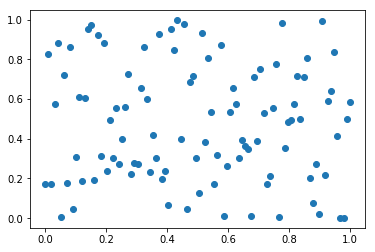

In [63]:
import matplotlib.pyplot as plt

x = np.load("x.npy")
y = np.load("y.npy")

plt.plot(x, y, 'o')

### Using file objects when reading and writing

In [64]:
x = np.linspace(0.0, 1.0, 100)
y = np.random.uniform(0.0, 1.0, 100)

with open("xy.dat", "wb") as f:
    np.save(f, x)
    np.save(f, y)

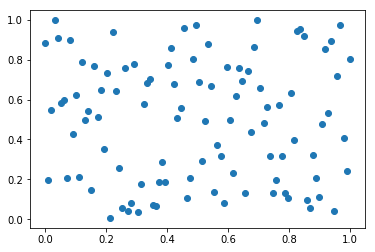

In [65]:
import matplotlib.pyplot as plt

with open("xy.dat", "rb") as f:
    x = np.load(f)
    y = np.load(f)

plt.plot(x, y, 'o')

# Solving equation systems

A common operation in linear algebra is the ability to solve an equation system in the form

Ax = b

NumPy contains a function **np.linalg()** to do just that:

In [66]:
A = np.matrix(
    [[1, 2, 3], 
     [11, 12, 13], 
     [21, 22, 23]]
)

x = np.matrix(
    [[1], 
     [2], 
     [3]])

print(A)
print(x)

b = np.linalg.solve(A, x)

print(b)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]
[[1]
 [2]
 [3]]
[[ 0.01733746]
 [-0.73467492]
 [ 0.81733746]]


### Alternative form

In [67]:
A = np.matrix(
    [[1, 2, 3], 
     [11, 12, 13],
     [21, 22, 23]]
)
x = np.matrix(
    [[1, 3],
     [2, 5],
     [3, 7]]
)

print(A)
print(x)

b = np.linalg.solve(A, x)

print(b)

[[ 1  2  3]
 [11 12 13]
 [21 22 23]]
[[1 3]
 [2 5]
 [3 7]]
[[ 0.01733746 -0.04272446]
 [-0.73467492 -2.31455108]
 [ 0.81733746  2.55727554]]
